In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [2]:
# pip install scikit-learn


In [3]:

df = pd.read_csv('dataset1.csv')

In [4]:
df.dropna(subset=['Language Main'], inplace=True)

In [5]:
df.head()

,Sno,Initials,First Name,Middle Name,Surname,Language Main
0,1.0,NaN,Hiranya,NaN,Durrani,Kashmiri
1,2.0,NaN,Bhupendra,NaN,Tikkoo,Kashmiri
2,3.0,NaN,Mrigavati,NaN,Durrani,Kashmiri
3,4.0,NaN,Smriti,NaN,Raina,Kashmiri
4,5.0,NaN,Heeposh,NaN,Talwar,Kashmiri


In [6]:
filter_cols = ['First Name', 'Surname']



In [7]:
df1 = df.dropna(how='all').dropna(how='all', axis=1)

In [8]:
# target_count = px.histogram(df, x='Language Main')

# target_count.show()

In [9]:
df1.head()

,Sno,First Name,Middle Name,Surname,Language Main
0,1.0,Hiranya,NaN,Durrani,Kashmiri
1,2.0,Bhupendra,NaN,Tikkoo,Kashmiri
2,3.0,Mrigavati,NaN,Durrani,Kashmiri
3,4.0,Smriti,NaN,Raina,Kashmiri
4,5.0,Heeposh,NaN,Talwar,Kashmiri


In [10]:
df2 = df1.drop(['Middle Name','Sno'],axis = 1)

In [11]:
df2.dtypes

First Name       object
Surname          object
Language Main    object
dtype: object

In [12]:
df2.head()

,First Name,Surname,Language Main
0,Hiranya,Durrani,Kashmiri
1,Bhupendra,Tikkoo,Kashmiri
2,Mrigavati,Durrani,Kashmiri
3,Smriti,Raina,Kashmiri
4,Heeposh,Talwar,Kashmiri


In [13]:
print(df2['First Name'].unique())
print(df2['Surname'].unique())

['Hiranya' 'Bhupendra' 'Mrigavati' ... 'Gargi' 'Prathmesh' 'Prathit']
['Durrani' 'Tikkoo' 'Raina' 'Talwar' 'Padar' 'Machama' 'Akhoon' 'Kanna'
 'Parimoo' 'Mirza' 'Dar' 'Munshi' 'Draboo' 'Chakoo' 'Bhat' 'Sangra' 'Khar'
 'Wani' 'Bharali' 'Neog' 'Sahu' 'Mahato' 'Thakur' 'Barua' 'Talukdar'
 'Bora' 'Gogoi' 'Borthakur' 'Goswami' 'Sharma' 'Chutiapeople' 'Hazarika'
 'Sutradhar' 'Sarma' 'Pathak' 'Deka' 'Rajni' 'Saikia' 'Phukan' 'Barah'
 'Borah' 'Ghosh' 'Baruah' 'Chakraborty' 'Bordoloi' 'Kumar' 'Choudhary'
 'Tiwari' 'Verma' 'Kashyap' 'Jaiswal' 'Shukla' 'Bharadwaj' 'Mishra'
 'Singh' 'Yadav' 'Rai' 'Jha' 'Sinha' 'Thandan' 'Vaidyar' 'Ezhuthachan'
 'Channar' 'Chekavar' 'Kaimal' 'Pillai' 'Menon' 'Kongassery' 'Nambiar'
 'Panikkar' 'Krishnan' 'Sebastian' 'Nair' 'Varghese' 'Kartha' 'Moopan'
 'Panicker' 'Konranchath' 'Thirumulpad' 'Vijayan' 'Achari' 'Chowdhury'
 'Dalal' 'Gajjar' 'Wadia' 'Doshi' 'Shah' 'Joshi' 'Dastur' 'Mistry'
 'Daruwala' 'Desai' 'Ganjawala' 'Cursetji' 'Kapadiya' 'Barot' 'Thakkar'
 'Mukesh

In [14]:
df2['First Name'].value_counts()
df2['Surname'].value_counts()

Ghosh          643
Chakraborty    643
Udayar         624
Shankar        592
Shetty         592
              ... 
Nanji          100
Choksi         100
Modi           100
Sheth          100
Gupta          100
Name: Surname, Length: 305, dtype: int64

In [15]:
data = pd.get_dummies(df2, columns = ['First Name', 'Surname'])
print(data)

      Language Main  First Name_10K+  First Name_Aaarti  First Name_Aabha  \
0          Kashmiri                0                  0                 0   
1          Kashmiri                0                  0                 0   
2          Kashmiri                0                  0                 0   
3          Kashmiri                0                  0                 0   
4          Kashmiri                0                  0                 0   
...             ...              ...                ...               ...   
81662       Marathi                0                  0                 0   
81663       Marathi                0                  0                 0   
81664       Marathi                0                  0                 0   
81665       Marathi                0                  0                 0   
81666       Marathi                0                  0                 0   

       First Name_Aabharan  First Name_Aabharana  First Name_Aabhas  \
0   

In [16]:
data.head()

,Language Main,First Name_10K+,First Name_Aaarti,First Name_Aabha,First Name_Aabharan,First Name_Aabharana,First Name_Aabhas,First Name_Aabhat,First Name_Aabheer,First Name_Aabheri,...,Surname_Varghese,Surname_Venkatraman,Surname_Verma,Surname_Vijayan,Surname_Vikram,Surname_VikramSarabhai,Surname_Virk,Surname_Wadia,Surname_Wani,Surname_Yadav
0,Kashmiri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kashmiri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kashmiri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kashmiri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kashmiri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#  def label_encoder(y):
#     le = LabelEncoder()
#     df2[y] = le.fit_transform(df2[y])
 
# label_list = ["First Name", "Surname"]

# for l in label_list:
#     label_encoder(l)
 
# #Display transformed data
# df2.head()

In [18]:
x=data.drop('Language Main',axis=1)
y=data['Language Main']
# x=pd.get_dummies(x)

In [19]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,train_size=.8,random_state=1)
x_test,x_valid,y_test,y_valid=train_test_split(x_temp,y_temp,train_size=0.4)

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Split the train data into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [21]:
x_train.shape

(65332, 4053)

In [22]:
y_train.shape

(65332,)

In [23]:
y_train

11505    Maithili
50756     Punjabi
37758     Kannada
28910     Bengali
70287       Oriya
           ...   
21440    Gujarati
73350      Telugu
50058     Punjabi
5192     Kashmiri
77709     Marathi
Name: Language Main, Length: 65332, dtype: object

In [24]:
x_valid.shape

(9801, 4053)

In [25]:
x_test.shape

(6533, 4053)

In [26]:
y_train = y_train.values.reshape(-1,1)

In [27]:
y_test = y_test.values.reshape(-1,1)

In [28]:
y_train.shape

(65332, 1)

In [29]:
y_test.shape

(6533, 1)

In [30]:
y_test

array([['Konakani'],
       ['Telugu'],
       ['Maithili'],
       ...,
       ['Nepali'],
       ['Tamil'],
       ['Maithili']], dtype=object)

In [31]:

# model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
# model.fit(x_train, y_train)
# model.score(x_test,y_test)  

In [32]:

# model0 = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
# model0.fit(x_train, y_train)
# model0.score(x_valid,y_valid)

In [33]:

model = BaggingClassifier(RandomForestClassifier(random_state = 42))
model.fit(x_train.values, y_train)
model.score(x_valid,y_valid)

c:\Users\AjithKomuravelly\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AjithKomuravelly\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9583715947352311

In [34]:
y_pred=model.predict(x_test)  


c:\Users\AjithKomuravelly\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [35]:
Y_pred2 = model.predict(x_train)

c:\Users\AjithKomuravelly\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [36]:


print("TRAIN accuracy:",np.round(accuracy_score(y_train,model.predict(x_train)),2))
print("TEST accuracy:",np.round(accuracy_score(y_test,y_pred),2))
print( classification_report(y_test,y_pred))

c:\Users\AjithKomuravelly\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


TRAIN accuracy: 0.99
TEST accuracy: 0.96
              precision    recall  f1-score   support

    Assamese       0.95      0.79      0.86       235
     Bengali       0.96      1.00      0.98       503
    Gujarati       1.00      0.84      0.91       278
     Kannada       0.90      0.86      0.88       444
    Kashmiri       1.00      1.00      1.00       424
    Konakani       1.00      1.00      1.00       408
    Maithili       0.88      0.99      0.94       519
   Malayalam       1.00      1.00      1.00       446
    Manipuri       1.00      1.00      1.00       452
     Marathi       1.00      0.89      0.94       306
      Nepali       0.99      1.00      0.99       447
       Oriya       1.00      1.00      1.00       321
     Punjabi       0.92      0.98      0.95       606
      Sindhi       0.95      0.81      0.87       277
       Tamil       1.00      1.00      1.00       367
      Telugu       0.92      1.00      0.96       500

    accuracy                           

In [37]:
Y_pred2

array(['Maithili', 'Punjabi', 'Kannada', ..., 'Punjabi', 'Kashmiri',
       'Marathi'], dtype=object)

In [38]:
y_pred

array(['Konakani', 'Telugu', 'Maithili', ..., 'Nepali', 'Tamil',
       'Maithili'], dtype=object)

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9603551201591918


In [40]:
y_val=model.predict(x_valid)

c:\Users\AjithKomuravelly\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid,y_val))

0.9583715947352311


In [42]:
df_test=pd.DataFrame(y_test)

In [43]:
df_test

,0
0,Konakani
1,Telugu
2,Maithili
3,Punjabi
4,Nepali
...,...
6528,Oriya
6529,Sindhi
6530,Nepali
6531,Tamil


In [44]:
df_test.columns=['y_test']
df_test

,y_test
0,Konakani
1,Telugu
2,Maithili
3,Punjabi
4,Nepali
...,...
6528,Oriya
6529,Sindhi
6530,Nepali
6531,Tamil


In [45]:
df_pred =pd.DataFrame(y_pred)

In [46]:
df_pred

,0
0,Konakani
1,Telugu
2,Maithili
3,Punjabi
4,Nepali
...,...
6528,Oriya
6529,Sindhi
6530,Nepali
6531,Tamil


In [47]:
df_pred.columns=['y_pred']
df_pred

,y_pred
0,Konakani
1,Telugu
2,Maithili
3,Punjabi
4,Nepali
...,...
6528,Oriya
6529,Sindhi
6530,Nepali
6531,Tamil


In [48]:
z=pd.concat([df_pred.reset_index(drop=True),df_test.reset_index(drop=True)],axis=1)

In [49]:
z

,y_pred,y_test
0,Konakani,Konakani
1,Telugu,Telugu
2,Maithili,Maithili
3,Punjabi,Punjabi
4,Nepali,Nepali
...,...,...
6528,Oriya,Oriya
6529,Sindhi,Sindhi
6530,Nepali,Nepali
6531,Tamil,Tamil


In [50]:
z['equal']=(z['y_test']==z['y_pred'])

In [51]:
z

,y_pred,y_test,equal
0,Konakani,Konakani,True
1,Telugu,Telugu,True
2,Maithili,Maithili,True
3,Punjabi,Punjabi,True
4,Nepali,Nepali,True
...,...,...,...
6528,Oriya,Oriya,True
6529,Sindhi,Sindhi,True
6530,Nepali,Nepali,True
6531,Tamil,Tamil,True


In [52]:
count=0
for i in z['equal']:
    if (i==False):
        count+=1
print(count)

259


In [53]:
# 252 - false
# 6281 - True

In [54]:
z['equal'].value_counts()

True     6274
False     259
Name: equal, dtype: int64

In [55]:
# FOR VALIDATION sET

<AxesSubplot:>

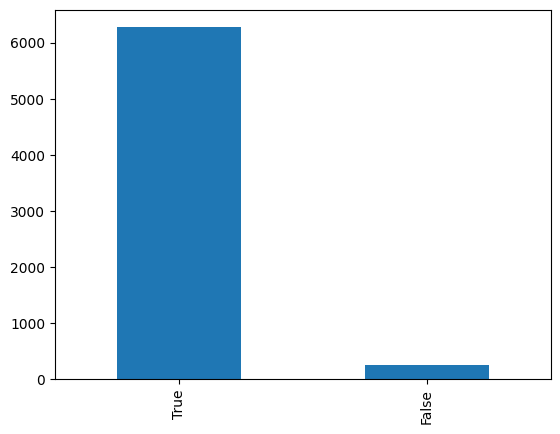

In [56]:
z['equal'].value_counts().plot.bar()

In [57]:
ae=pd.DataFrame(y_val)

In [58]:
ae

,0
0,Telugu
1,Bengali
2,Manipuri
3,Konakani
4,Kannada
...,...
9796,Sindhi
9797,Kashmiri
9798,Manipuri
9799,Manipuri


In [59]:
ae.columns=['y_val']

In [60]:
ae

,y_val
0,Telugu
1,Bengali
2,Manipuri
3,Konakani
4,Kannada
...,...
9796,Sindhi
9797,Kashmiri
9798,Manipuri
9799,Manipuri


In [61]:
be=pd.DataFrame(y_valid)

In [62]:
be

,Language Main
39943,Kannada
28890,Bengali
42895,Manipuri
32286,Konakani
40125,Kannada
...,...
49060,Sindhi
2328,Kashmiri
42909,Manipuri
42891,Manipuri


In [63]:
be.columns=['y_valid']

In [64]:
be

,y_valid
39943,Kannada
28890,Bengali
42895,Manipuri
32286,Konakani
40125,Kannada
...,...
49060,Sindhi
2328,Kashmiri
42909,Manipuri
42891,Manipuri


In [65]:
y=pd.concat([ae.reset_index(drop=True),be.reset_index(drop=True)],axis=1)

In [66]:
y

,y_val,y_valid
0,Telugu,Kannada
1,Bengali,Bengali
2,Manipuri,Manipuri
3,Konakani,Konakani
4,Kannada,Kannada
...,...,...
9796,Sindhi,Sindhi
9797,Kashmiri,Kashmiri
9798,Manipuri,Manipuri
9799,Manipuri,Manipuri


In [67]:
y.head(10
      )

,y_val,y_valid
0,Telugu,Kannada
1,Bengali,Bengali
2,Manipuri,Manipuri
3,Konakani,Konakani
4,Kannada,Kannada
5,Tamil,Tamil
6,Kannada,Kannada
7,Oriya,Oriya
8,Tamil,Tamil
9,Punjabi,Punjabi


In [68]:
y['is_equal']=(y['y_val'] == y['y_valid'])

In [69]:
y

,y_val,y_valid,is_equal
0,Telugu,Kannada,False
1,Bengali,Bengali,True
2,Manipuri,Manipuri,True
3,Konakani,Konakani,True
4,Kannada,Kannada,True
...,...,...,...
9796,Sindhi,Sindhi,True
9797,Kashmiri,Kashmiri,True
9798,Manipuri,Manipuri,True
9799,Manipuri,Manipuri,True


<AxesSubplot:>

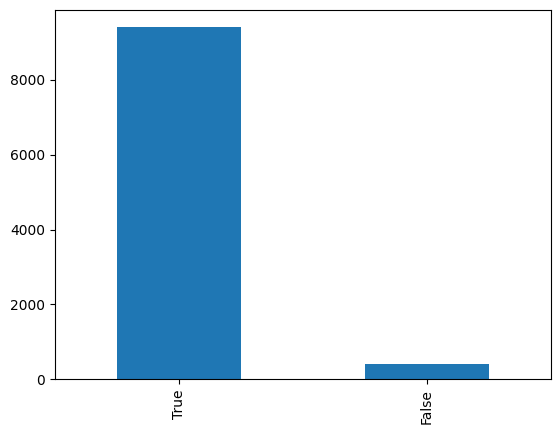

In [70]:
y['is_equal'].value_counts().plot.bar()

In [71]:
import joblib
from flask import Flask, render_template,url_for,request

In [72]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
# #Serialize the model and save
# # from sklearn.externals import joblib
# joblib.dump(model, 'randomfs.pkl')
# print("Random Forest Model Saved")
# #Load the model
# model = joblib.load('randomfs.pkl')
# # Save features from training
# rnd_columns = list(x_train.columns)
# joblib.dump(rnd_columns, 'rnd_columns.pkl')
# print("Random Forest Model Colums Saved")

In [74]:
# joblib.dump(model, 'model.pkl')
# print("Model dumped!")
    
#     #ytb_model = open('spam_model.pkl', 'rb')
# model = joblib.load('model.pkl')
# if request.method == 'POST':
#     comment = request.form['comment']
#     data = [comment]
#     vect = cv.transform(data).toarray()
#     my_prediction = model.predict(vect)
# return render_template('result.html', prediction = my_prediction)

# if __name__ == '__main__':
#     app.run(debug=True)


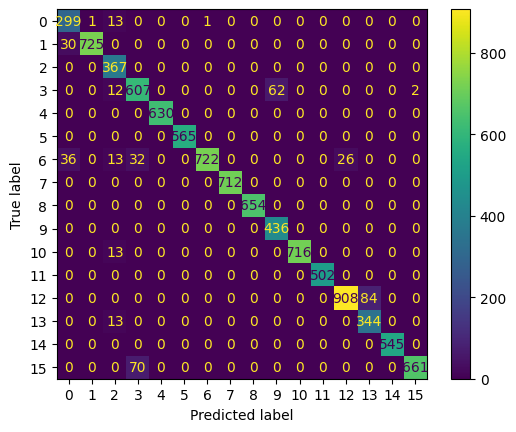

In [75]:
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_val, y_valid)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [76]:
import pickle

pickle.dump(model, open('modelUpdated.pkl', 'wb'))

In [77]:
# pickled_model = pickle.load(open('model.pkl', 'rb'))

In [78]:
# pickled_model.predict(x_test)